In [1]:
seed = 42  # for reproducibility

import pickle
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["axes.grid"] = False
%matplotlib inline

import os
import sys
from pathlib import Path
import torch
import torch.nn.functional as F
from torchvision.utils import make_grid, save_image
from sklearn.metrics import plot_confusion_matrix
torch.manual_seed(seed)
sys.path.append(str(Path().absolute().parent))
plt.style.use('seaborn')

In [2]:
exp_path = Path().absolute().parent.parent.joinpath('src/experiments/0053_5centers_30epr1fr_BALANCED_ResNet18_Isolated_FIXEDorientation')
clog_path = 'experiments/0054_5centers_30epr1fr_BALANCED_ResNet18_Isolated_FIXEDorientationClient_Logs'
stge_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/stge')
jarv_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/jarv')
bcdr_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/bcdr')
inbreast_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/inbreast')
cmmd_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/cmmd')

In [3]:
pickle_file = 'log.pkl'
with open(exp_path.joinpath(pickle_file), 'rb') as handle:
    aggregated_metrics = pickle.load(handle)
    
with open(stge_path.joinpath(pickle_file), 'rb') as handle:
    stge_metrics = pickle.load(handle)
with open(jarv_path.joinpath(pickle_file), 'rb') as handle:
    jarv_metrics = pickle.load(handle)
    
with open(inbreast_path.joinpath(pickle_file), 'rb') as handle:
    inbreast_metrics = pickle.load(handle)
    
with open(bcdr_path.joinpath(pickle_file), 'rb') as handle:
    bcdr_metrics = pickle.load(handle)
    
with open(cmmd_path.joinpath(pickle_file), 'rb') as handle:
    cmmd_metrics = pickle.load(handle)

In [4]:
cmmd_metrics.keys()

dict_keys(['local_loss', 'GMLD_val_loss', 'LMLD_val_loss', 'local_accuracy', 'local_sensitivity', 'local_specificity', 'local_val_predictions', 'GMLD_accuracy', 'GMLD_true_positives', 'GMLD_false_positives', 'GMLD_false_negatives', 'GMLD_true_negatives', 'LMLD_train_accuracy', 'LMLD_val_accuracy', 'LMLD_train_true_positives', 'LMLD_train_false_positives', 'LMLD_train_false_negatives', 'LMLD_train_true_negatives', 'LMLD_val_true_positives', 'LMLD_val_false_positives', 'LMLD_val_false_negatives', 'LMLD_val_true_negatives'])

# Accuracies, 5 folds, 100 epochs. Average so that you get 1,100 np array (averaged across folds)

In [5]:
aggregated_metrics.keys()

dict_keys(['accuracies_aggregated', 'total_val_loss', 'time_spent'])

In [6]:
aggregated_metrics['accuracies_aggregated']

[0.5787626165698121]

In [7]:
inbreast_metrics['local_loss']

{0: [0.49472400546073914,
  0.3813588321208954,
  0.18125885725021362,
  0.09663865715265274,
  0.13672000169754028,
  0.010253841988742352,
  0.0075437515042722225,
  0.02953438274562359,
  0.004968004766851664,
  0.0049901120364665985,
  0.003922118339687586,
  0.0027861585840582848,
  0.0025095250457525253,
  0.002286207163706422,
  0.002057027770206332,
  0.001889605075120926,
  0.0017486283322796226,
  0.0016272312495857477,
  0.0015233169542625546,
  0.0014296233421191573,
  0.0013463603099808097,
  0.0012701762607321143,
  0.0012041841400787234,
  0.0011440023081377149,
  0.0010896146995946765,
  0.0010384598281234503,
  0.000991987413726747,
  0.0009502337197773159,
  0.0009107736987061799,
  0.0008748797699809074],
 1: []}

In [11]:
cmmd_metrics['LMLD_train_accuracy']

[1.0]

In [12]:
cmmd_metrics['LMLD_val_accuracy']

[0.9009009009009009]

## Curve

In [13]:
[cmmd_metrics['local_loss'][i][0] for i in range(len(cmmd_metrics['local_loss'])-1)]

[0.4815751314163208]

In [14]:
cmmd_losses_local = np.array([cmmd_metrics['local_loss'][i][0] for i in range(len(cmmd_metrics['local_loss'])-1)])
inbreast_losses_local = np.array([inbreast_metrics['local_loss'][i][0] for i in range(len(inbreast_metrics['local_loss'])-1)])
stge_losses_local = np.array([stge_metrics['local_loss'][i][0] for i in range(len(stge_metrics['local_loss'])-1)])
jarv_losses_local = np.array([jarv_metrics['local_loss'][i][0] for i in range(len(jarv_metrics['local_loss'])-1)])
bcdr_losses_local = np.array([bcdr_metrics['local_loss'][i][0] for i in range(len(bcdr_metrics['local_loss'])-1)])
steps = range(len(cmmd_losses_local))

In [17]:
cmmd_losses_local = np.array([cmmd_metrics['local_loss'][i][0] for i in range(len(cmmd_metrics['local_loss'])-1)])
inbreast_losses_local = np.array([inbreast_metrics['local_loss'][i][0] for i in range(len(inbreast_metrics['local_loss'])-1)])
stge_losses_local = np.array([stge_metrics['local_loss'][i][0] for i in range(len(stge_metrics['local_loss'])-1)])
jarv_losses_local = np.array([jarv_metrics['local_loss'][i][0] for i in range(len(jarv_metrics['local_loss'])-1)])
bcdr_losses_local = np.array([bcdr_metrics['local_loss'][i][0] for i in range(len(bcdr_metrics['local_loss'])-1)])
steps = range(len(cmmd_losses_local))

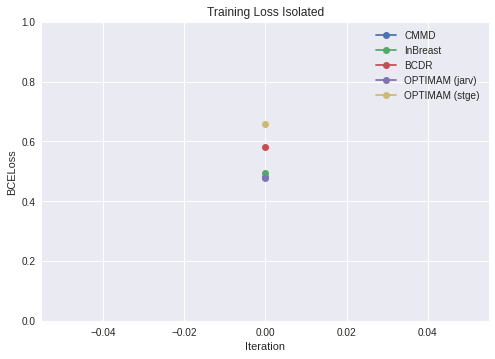

In [18]:
plt.plot(steps, cmmd_losses_local,'-o', label='CMMD')
plt.plot(steps, inbreast_losses_local,'-o', label='InBreast')
plt.plot(steps, bcdr_losses_local,'-o', label='BCDR')
plt.plot(steps, jarv_losses_local,'-o', label='OPTIMAM (jarv)')
plt.plot(steps, stge_losses_local,'-o', label='OPTIMAM (stge)')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0,1)
plt.ylabel('BCELoss')
plt.title('Training Loss Isolated')
plt.savefig('./plots/train_loss_per_center_30EPR1FR_isolated.png')

In [16]:
cmmd_metrics['local_val_loss']

{0: 0.6925707048839993,
 1: 0.6585438198513455,
 2: 0.6541998002264234,
 3: 0.648699387576845,
 4: 0.633535768588384,
 5: 0.6285219543510013,
 6: 0.6142073028617435,
 7: 0.5930118249522315,
 8: 0.5907360235850017,
 9: 0.5817838675445981,
 10: 0.5744067668914795,
 11: 0.5608846094873217,
 12: 0.5559620473119947,
 13: 0.5434345930814743,
 14: 0.5356652385658688,
 15: 0.5349177410205205,
 16: 0.5233970804346932,
 17: 0.511771121289995,
 18: 0.5135102798541387,
 19: 0.5055827862686582,
 20: 0.5060317718320423,
 21: 0.5084520962503222,
 22: 0.4984374201960034,
 23: 0.504716807934973,
 24: 0.5017271286911434,
 25: 0.4872842272122701,
 26: 0.48925179607338376,
 27: 0.47453087667624155,
 28: 0.48051385945743985,
 29: 0.47195044060548147,
 30: []}

In [17]:
for i in range(len(cmmd_metrics['local_val_loss'])-1):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [18]:
[cmmd_metrics['local_val_loss'][i] for i in range(len(cmmd_metrics['local_val_loss'])-1)]

[0.6925707048839993,
 0.6585438198513455,
 0.6541998002264234,
 0.648699387576845,
 0.633535768588384,
 0.6285219543510013,
 0.6142073028617435,
 0.5930118249522315,
 0.5907360235850017,
 0.5817838675445981,
 0.5744067668914795,
 0.5608846094873217,
 0.5559620473119947,
 0.5434345930814743,
 0.5356652385658688,
 0.5349177410205205,
 0.5233970804346932,
 0.511771121289995,
 0.5135102798541387,
 0.5055827862686582,
 0.5060317718320423,
 0.5084520962503222,
 0.4984374201960034,
 0.504716807934973,
 0.5017271286911434,
 0.4872842272122701,
 0.48925179607338376,
 0.47453087667624155,
 0.48051385945743985,
 0.47195044060548147]

In [19]:
cmmd_losses_local = np.array([cmmd_metrics['local_val_loss'][i] for i in range(len(cmmd_metrics['local_val_loss'])-1)])
inbreast_losses_local = np.array([inbreast_metrics['local_val_loss'][i] for i in range(len(inbreast_metrics['local_val_loss'])-1)])
stge_losses_local = np.array([stge_metrics['local_val_loss'][i] for i in range(len(stge_metrics['local_val_loss'])-1)])
jarv_losses_local = np.array([jarv_metrics['local_val_loss'][i] for i in range(len(jarv_metrics['local_val_loss'])-1)])
bcdr_losses_local = np.array([bcdr_metrics['local_val_loss'][i] for i in range(len(bcdr_metrics['local_val_loss'])-1)])
steps = range(len(cmmd_losses_local))

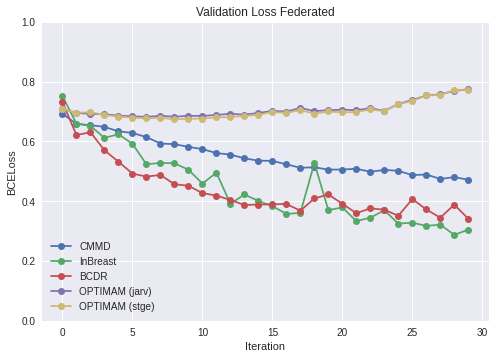

In [20]:
plt.plot(steps, cmmd_losses_local,'-o', label='CMMD')
plt.plot(steps, inbreast_losses_local,'-o', label='InBreast')
plt.plot(steps, bcdr_losses_local,'-o', label='BCDR')
plt.plot(steps, jarv_losses_local,'-o', label='OPTIMAM (jarv)')
plt.plot(steps, stge_losses_local,'-o', label='OPTIMAM (stge)')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0,1)
plt.ylabel('BCELoss')
plt.title('Validation Loss Federated')
plt.savefig('./plots/val_loss_per_center_30EPR1FR_MEDIAN.png')

ValueError: x and y must have same first dimension, but have shapes (30,) and (1,)

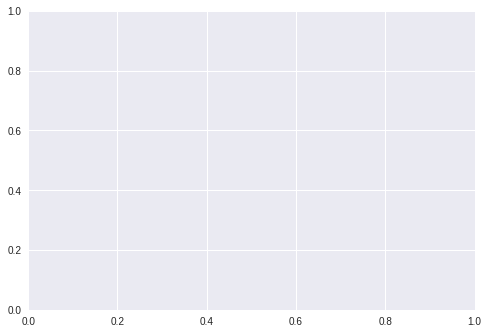

In [21]:
plt.plot(steps, aggregated_metrics,'-o', label='aggregated')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0,1)
plt.ylabel('BCELoss')
plt.title('Training Each Center Isolation')
plt.savefig('./plots/sanity_check_success1EPR30FR.png')

In [22]:
cmmd_accuracy = [cmmd_metrics['GMLD_true_positives'][i] / (cmmd_metrics['GMLD_true_positives'][i] + cmmd_metrics['GMLD_false_negatives'][i]) for i in range(len(cmmd_metrics['GMLD_true_positives']))]
cmmd_sensitivity = [cmmd_metrics['GMLD_true_positives'][i] / (cmmd_metrics['GMLD_true_positives'][i] + cmmd_metrics['GMLD_false_negatives'][i]) for i in range(len(cmmd_metrics['GMLD_true_positives']))]
cmmd_specificity = [cmmd_metrics['GMLD_true_negatives'][i] / (cmmd_metrics['GMLD_true_negatives'][i] + cmmd_metrics['GMLD_false_positives'][i]) for i in range(len(cmmd_metrics['GMLD_true_negatives']))]
cmmd_f1 = [2 * cmmd_metrics['GMLD_true_positives'][i] / (2 * cmmd_metrics['GMLD_true_positives'][i] + cmmd_metrics['GMLD_false_positives'][i] + cmmd_metrics['GMLD_false_negatives'][i]) for i in range(len(cmmd_metrics['GMLD_true_positives']))]
# cmmd_AUC = [sklearn.metrics.roc_auc_score(cmmd_metrics['GMLD_labels'][i].detach().numpy(), cmmd_metrics['GMLD_predictions'][i].detach().numpy()) for i in range(len(cmmd_metrics['GMLD_true_positives']))]


In [24]:
cmmd_f1

[0.5340050377833753,
 0.5771144278606966,
 0.5743589743589743,
 0.585,
 0.6127450980392157,
 0.6270022883295194,
 0.6420323325635104,
 0.6862302483069977,
 0.6635294117647059,
 0.6827133479212254,
 0.6850574712643678,
 0.7013574660633484,
 0.7133182844243793,
 0.7223476297968398,
 0.7172413793103448,
 0.7149321266968326,
 0.7427293064876958,
 0.724373576309795,
 0.7427293064876958,
 0.7472035794183445,
 0.75,
 0.7549668874172185,
 0.7688984881209503,
 0.7735042735042735,
 0.7733333333333333,
 0.7787610619469026,
 0.7857142857142857,
 0.775330396475771,
 0.774617067833698,
 0.7837837837837838]

In [19]:
stge_f1 = [2 * stge_metrics['GMLD_true_positives'][i] / (2 * stge_metrics['GMLD_true_positives'][i] + stge_metrics['GMLD_false_positives'][i] + stge_metrics['GMLD_false_negatives'][i]) for i in range(len(stge_metrics['GMLD_true_positives']))]
jarv_f1 = [2 * jarv_metrics['GMLD_true_positives'][i] / (2 * jarv_metrics['GMLD_true_positives'][i] + jarv_metrics['GMLD_false_positives'][i] + jarv_metrics['GMLD_false_negatives'][i]) for i in range(len(jarv_metrics['GMLD_true_positives']))]
bcdr_f1 = [2 * bcdr_metrics['GMLD_true_positives'][i] / (2 * bcdr_metrics['GMLD_true_positives'][i] + bcdr_metrics['GMLD_false_positives'][i] + bcdr_metrics['GMLD_false_negatives'][i]) for i in range(len(jarv_metrics['GMLD_true_positives']))]
inbreast_f1 = [2 * inbreast_metrics['GMLD_true_positives'][i] / (2 * inbreast_metrics['GMLD_true_positives'][i] + inbreast_metrics['GMLD_false_positives'][i] + inbreast_metrics['GMLD_false_negatives'][i]) for i in range(len(jarv_metrics['GMLD_true_positives']))]

In [21]:
stge_f1

[0.7141491395793499]

In [22]:
jarv_f1

[0.5946275946275946]

In [23]:
bcdr_f1

[0.6341463414634146]

In [24]:
inbreast_f1

[0.2777777777777778]

NameError: name 'cmmd_f1' is not defined

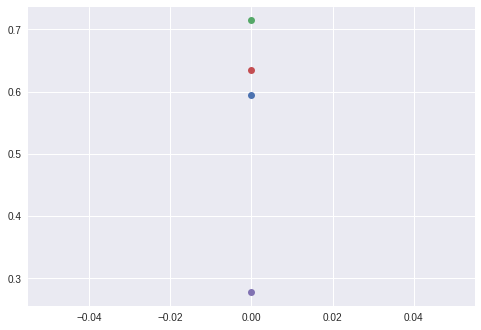

In [20]:
plt.plot(steps, jarv_f1,'-o', label='jarv')
plt.plot(steps, stge_f1,'-o', label='stge')
plt.plot(steps, bcdr_f1,'-o', label='bcdr')
plt.plot(steps, inbreast_f1,'-o', label='inbreast')
plt.plot(steps, cmmd_f1,'-o', label='cmmd')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0.2,1)
plt.ylabel('F1 Score')
plt.title('F1 Score per Center')
plt.savefig('./plots/FMedian_F1_Isolated.png')